## PROYECTO STARTUP PRODUCTOS ALIMINETICIOS

OBJETIVO: Estudiar el comportamiento de usuario

Cada entrada de registro es una acción de usuario o un evento.

* EventName: nombre del evento.
* DeviceIDHash: identificador de usuario unívoco.
* EventTimestamp: hora del evento.
* ExpId: número de experimento: 246 y 247 son los grupos de control, 248 es el grupo de prueba.

---
#### ETAPAS DEL PROYECTO 
* Etapa 1: Preparar datos para el análisis
* Etapa 2: Estudiar y comprobar datos
* Etapa 3: Estudiar el embudo de eventos 
* Etapa 4: Estudiar los resultados del experimento



ETAPA 1: PREPARACIÓN DE LOS DATOS 

In [35]:
#importar librerias
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import statsmodels.api as sm


In [36]:
#leer la base de datos 
data = pd.read_csv('logs_exp_us.csv', sep='\t')
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [37]:
#cambiar el nombre de las columnas 
data.columns = ['event_name', 'user_id', 'event_date','group']
data['event_date'] = pd.to_datetime(data['event_date'], unit='s')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   event_date  244126 non-null  datetime64[ns]
 3   group       244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB


In [38]:
data

,event_name,user_id,event_date,group
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [39]:
#exploracion de datos 
data['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [40]:
#exploracion de datos
data.describe()

,user_id,event_date,group
count,2.441260e+05,244126,244126.000000
mean,4.627568e+18,2019-08-04 10:18:35.842716160,247.022296
min,6.888747e+15,2019-07-25 04:43:36,246.000000
25%,2.372212e+18,2019-08-02 14:36:20.249999872,246.000000
50%,4.623192e+18,2019-08-04 11:49:55,247.000000
75%,6.932517e+18,2019-08-06 06:55:11,248.000000
max,9.222603e+18,2019-08-07 21:15:17,248.000000
std,2.642425e+18,NaN,0.824434


In [41]:
#duplicados y datos nulos 
data.duplicated().sum()
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

data.isna().sum()

0


event_name    0
user_id       0
event_date    0
group         0
dtype: int64

In [42]:
#crear columnas separadas para fecha y hora
#una columna solo con la fecha
data['date'] = data['event_date'].dt.date

#una columna solo con la hora
data['hour'] = data['event_date'].dt.time


In [43]:
data

,event_name,user_id,event_date,group,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


ETAPA 2: ESTUDIAR Y COMPROBAR LOS DATOS

* ¿Cuántos eventos hay en los registros?
* ¿Cuántos usuarios y usuarias hay en los registros?
* ¿Cuál es el promedio de eventos por usuario?
* ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios o usuarias por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?
* ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
* Asegúrate de tener usuarios y usuarias de los tres grupos experimentales.

In [44]:
#cuantos eventos hay en los registros
n_events = data['event_name'].value_counts().reset_index()
n_events


,event_name,count
0,MainScreenAppear,119101
1,OffersScreenAppear,46808
2,CartScreenAppear,42668
3,PaymentScreenSuccessful,34118
4,Tutorial,1018


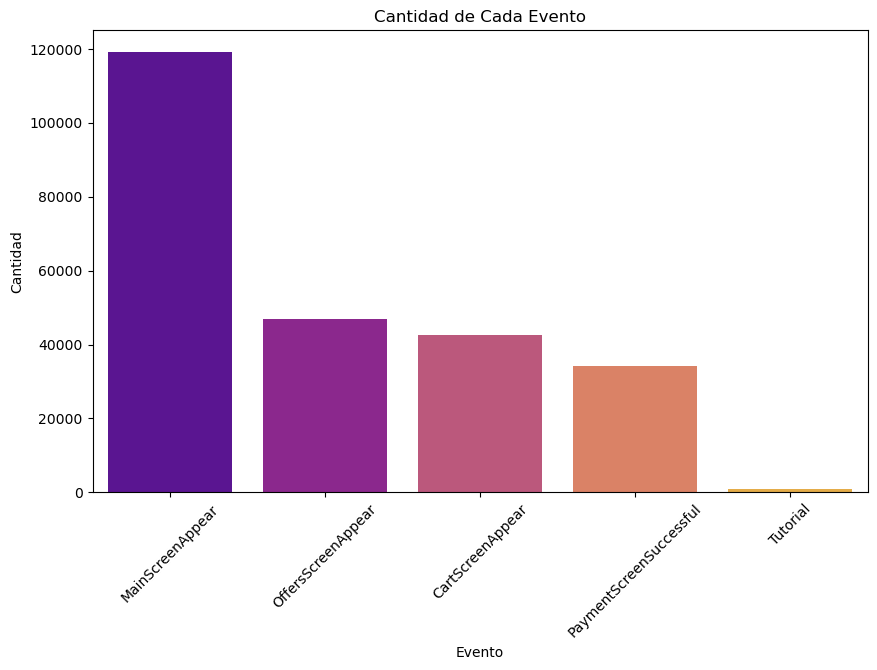

In [45]:
#gráfico de barras para visualizar la cantidad de cada evento
plt.figure(figsize=(10, 6))
sns.barplot(data=n_events, x='event_name', y='count', palette='plasma')
plt.title('Cantidad de Cada Evento')
plt.xlabel('Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Calcular el porcentaje de cada evento
n_events['proportion'] = (n_events['count'] /n_events['count'].sum()) * 100

n_events = n_events.sort_values(by='count')

# Crear un gráfico de embudo para visualizar el porcentaje de cada evento
fig = px.funnel(n_events, x='proportion', y='event_name', color='event_name', title='Porcentaje de Cada Evento')
fig.show()

	
Segun los gráficos existen un total de 119101 entradas a MainScreenAppear, 46808 en OffersScreenAppear, 42668 en CartScreenAppear, 34118 en PaymentScreenSuccessful y solamente 1018 entradas en Tutorial, esto representaría un porcentaje de acción en los usuarios de un 49%, 19%, 17%, 14% y 0.4% en cada evento respectivamente. 

                event_name  user_id
4                 Tutorial      847
3  PaymentScreenSuccessful     3547
0         CartScreenAppear     3749
2       OffersScreenAppear     4613
1         MainScreenAppear     7439


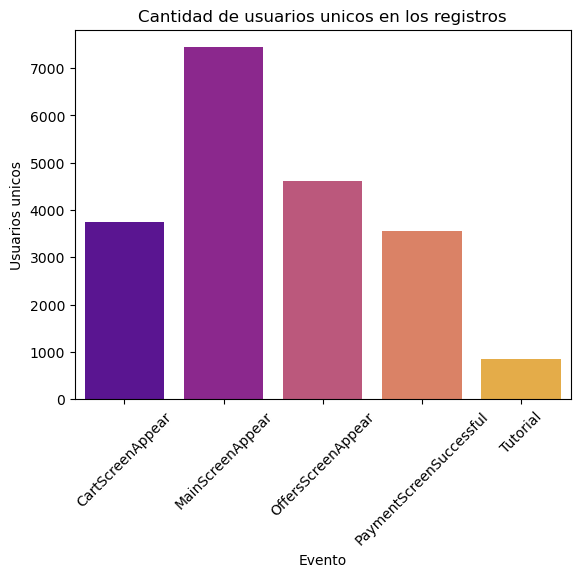

In [47]:
#cantidad de usuarios por evento

n_users_per_event = data.groupby('event_name')['user_id'].nunique().reset_index()
print(n_users_per_event.sort_values(by='user_id'))

#cantidad de usuarios unicos que realizaron una interacion en distintas partes de la pagina 
sns.barplot(n_users_per_event, x='event_name', y='user_id', palette='plasma')
plt.title('Cantidad de usuarios unicos en los registros')
plt.xlabel('Evento')
plt.ylabel('Usuarios unicos')
plt.xticks(rotation=45)
plt.show()

In [48]:
#usuarios unicos 
data['user_id'].nunique()

7551

Promedio de eventos por usuario: 32.27559263673685


c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



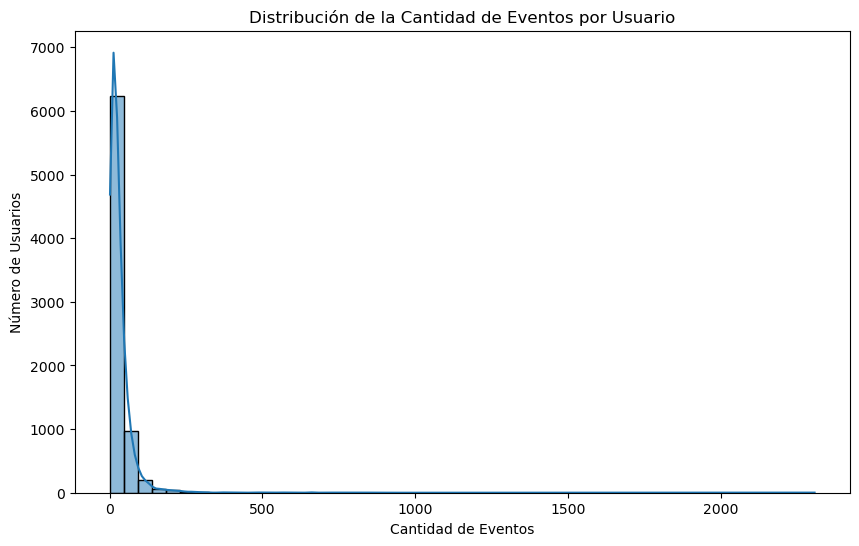

In [49]:
#promedio de eventos pos usuario 
event_per_user = data.groupby('user_id')['event_name'].count().reset_index()
event_per_user.columns = ['user_id', 'n_event']
event_per_user
print('Promedio de eventos por usuario:', event_per_user['n_event'].mean())

#Histograma de eventos por usuario 
plt.figure(figsize=(10, 6))
sns.histplot(event_per_user['n_event'], bins=50, kde=True)
plt.title('Distribución de la Cantidad de Eventos por Usuario')
plt.xlabel('Cantidad de Eventos')
plt.ylabel('Número de Usuarios')
plt.show()


In [50]:
data

,event_name,user_id,event_date,group,date,hour
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11:48:42
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


In [51]:
#periodo que cubren los datos

data.describe()

,user_id,event_date,group
count,2.437130e+05,243713,243713.000000
mean,4.627963e+18,2019-08-04 10:19:17.987665920,247.022161
min,6.888747e+15,2019-07-25 04:43:36,246.000000
25%,2.372212e+18,2019-08-02 14:36:45,246.000000
50%,4.623192e+18,2019-08-04 11:51:00,247.000000
75%,6.932517e+18,2019-08-06 06:56:24,248.000000
max,9.222603e+18,2019-08-07 21:15:17,248.000000
std,2.642723e+18,NaN,0.824420


Los registros van desde el 25 de Julio de 2019 hasta el 7 de Agosto de 2019

c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



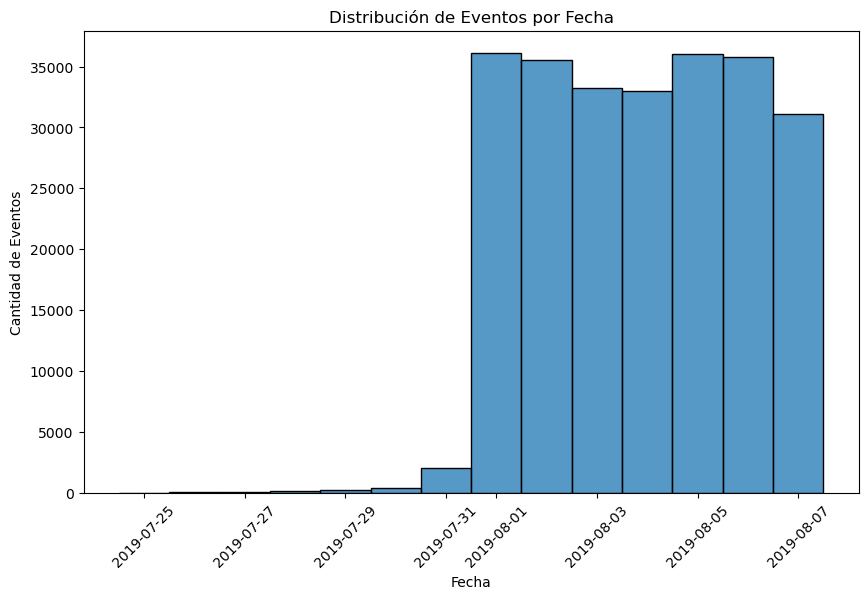

In [52]:
## Histograma por fecha
plt.figure(figsize=(10, 6))
sns.histplot(data['date'], bins=50, kde=False)
plt.title('Distribución de Eventos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Eventos')
plt.xticks(rotation=45)
plt.show()


c:\Users\Cata Rivera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



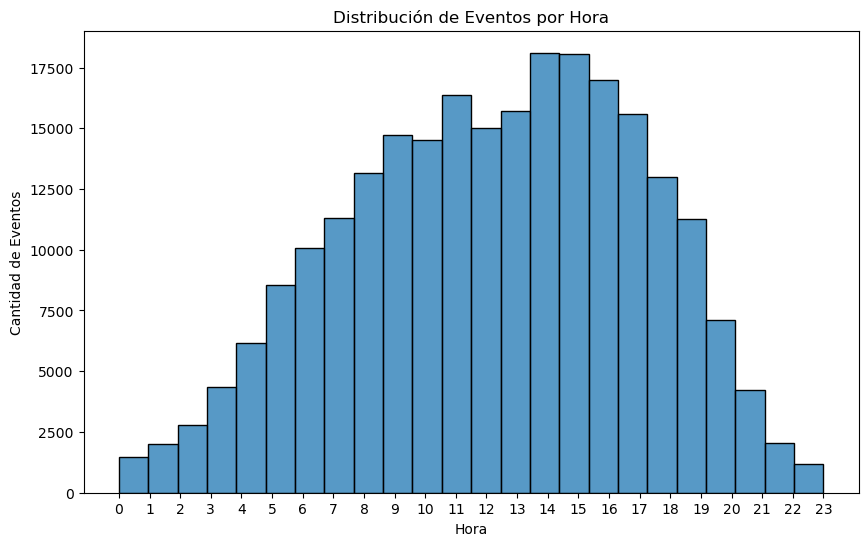

In [53]:
# Histograma por hora
plt.figure(figsize=(10, 6))
sns.histplot(data['event_date'].dt.hour, bins=24, kde=False)
plt.title('Distribución de Eventos por Hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Eventos')
plt.xticks(range(24))
plt.show()

Se puede observar a través de los gráficos que la mayor cantidad de eventos se produce a las 14, 15 y 16 horas probablemente coincidentes con los horarios de almuerzo de los usuarios. Además, los datos de los eventos en la plataforma muestran mayor actividad y se estabilizan el día 01 de agosto de 2019. Por lo que los siguientes analisis se realizaran a partir de esta fecha. 


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  243713 non-null  object        
 1   user_id     243713 non-null  int64         
 2   event_date  243713 non-null  datetime64[ns]
 3   group       243713 non-null  int64         
 4   date        243713 non-null  object        
 5   hour        243713 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.0+ MB


In [55]:
#base de datos a partir del 2019-08-01
new_data = data[data['event_date'] >= '2019-08-01']
print(new_data['date'].nunique())
new_data.info()
print('---------------------')
print('numero de eventos perdidos:', data.shape[0]-new_data.shape[0])
print(((data.shape[0]-new_data.shape[0])/data.shape[0])*100)
print('numero de usuarios perdidos:', data['user_id'].nunique()-new_data['user_id'].nunique())


7
<class 'pandas.core.frame.DataFrame'>
Index: 240887 entries, 2828 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  240887 non-null  object        
 1   user_id     240887 non-null  int64         
 2   event_date  240887 non-null  datetime64[ns]
 3   group       240887 non-null  int64         
 4   date        240887 non-null  object        
 5   hour        240887 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 12.9+ MB
---------------------
numero de eventos perdidos: 2826
1.159560630741897
numero de usuarios perdidos: 17


In [56]:
#comprobar grupos en la nueva base de datos
new_data['group'].value_counts()

group
248    84563
246    79302
247    77022
Name: count, dtype: int64

La base de datos original posee 243713 datos de eventos, al filtrarla y dejar solo los días con más cantidad de eventos registrados se conservan 240887, de esta manera solo se han eliminado 2826 datos, un número bastante bajo que representa solo un 1,15% de los datos totales. Además, los datos eliminados corresponden solamente a 17 usuarios.

Por último, dentro de la nueva base de datos se cuenta con un número más o menos similar de los 3 grupos de estudio. 


---

ETAPA 3: ESTUDIO DEL EMBUDO DE EVENTOS 

* Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
* Encuentra la cantidad de usuarios y usuarias que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios y usuarias. Calcula la proporción de usuarios y usuarias que realizaron la acción al menos una vez.* 
* ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
* Utiliza el embudo de eventos para encontrar la proporción de usuarios y usuarias que pasan de una etapa a la siguiente. (Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B).
* ¿En qué etapa pierdes más usuarios y usuarias?
* ¿Qué porcentaje de usuarios y usuarias hace todo el viaje desde su primer evento hasta el pago?


                event_name   count
0         MainScreenAppear  117328
1       OffersScreenAppear   46333
2         CartScreenAppear   42303
3  PaymentScreenSuccessful   33918
4                 Tutorial    1005


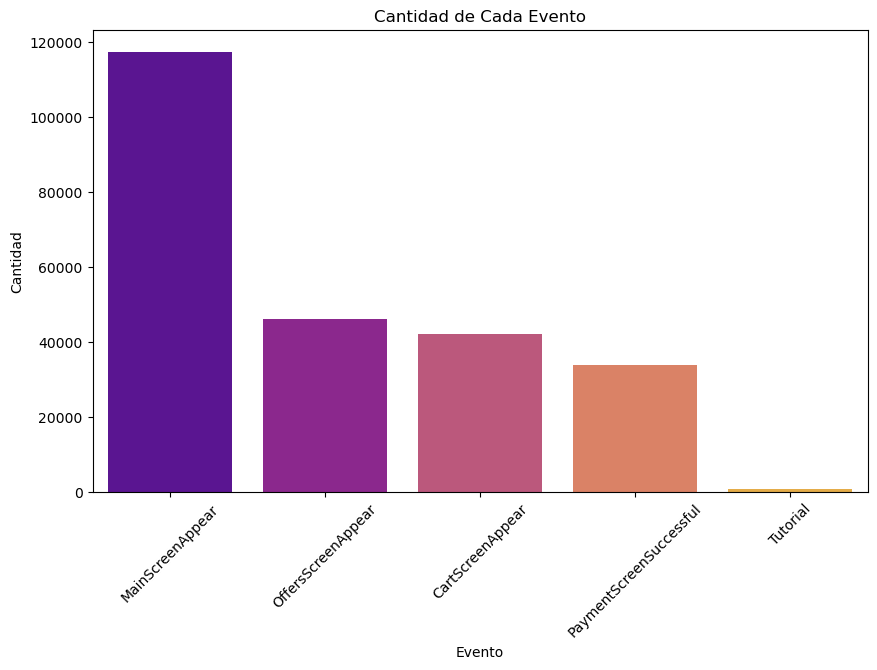

In [57]:
#frecuencia de los eventos 
events_frequency = new_data['event_name'].value_counts().reset_index()
print(events_frequency)

#graficar frecuencia de eventos
plt.figure(figsize=(10, 6))
sns.barplot(data=events_frequency, x='event_name', y='count', palette='plasma')
plt.title('Cantidad de Cada Evento')
plt.xlabel('Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [58]:
#Usuarios que realizaron cada accion al menos una vez
user_counts = new_data.groupby('event_name')['user_id'].nunique().reset_index()
user_counts.columns = ['event_name', 'user_count']

# Ordenar los eventos por el número de usuarios
user_counts = user_counts.sort_values(by='user_count')

# Total de usuarios únicos
total_users = data['user_id'].nunique()

# Calcular la proporción de usuarios que realizaron una acción al menos una vez
user_counts['proportion'] = (user_counts['user_count'] / total_users)

print(total_users)
user_counts

7551


,event_name,user_count,proportion
4,Tutorial,840,0.111244
3,PaymentScreenSuccessful,3539,0.468680
0,CartScreenAppear,3734,0.494504
2,OffersScreenAppear,4593,0.608264
1,MainScreenAppear,7419,0.982519


In [59]:
# Crear un gráfico de embudo para visualizar el porcentaje de cada evento Segun el TOTAL de usuarios que interactuan
fig = px.funnel(user_counts, x='proportion', y='event_name', color='event_name', title='Porcentaje de Cada Evento segun el TOTAL de usuarios')
fig.show()

El 98% de todos los usuarios que interactuan con la app lograron entrar a la página principal, 60% de todos los usuarios llegan hasta la página de ofertas, el 49% de todos los usuarios abren la pagina del carrito de compras, 46% logran un pago exitoso y solo el 11% de todos los usuarios registrados en la app abren el tutorial. 

Dado los nombres de los eventos, un posible orden lógico de las acciones podría ser el siguiente:

1. MainScreenAppearm = Abre pantalla principal
2. OffersScreenAppear = Abre pagina de ofertas
3. CartScreenAppear = Abre el carrito
4. PaymentScreenSuccessful = Pago exitoso

Tutorial* se decide dejar como un paso aparte, no influye directamente en los demás. 

Sin embargo, la secuencia puede variar según el comportamiento del usuario. No necesariamente todos los eventos forman parte de una sola secuencia lineal, especialmente el Tutorial, que podría ocurrir en cualquier momento.

Para este caso práctico se tomará el siguiente orden lógico:

1. Abre pantalla principal
2. Abre pagina de ofertas
3. Abre el carrito
4. Pago exitoso

In [60]:
#visualización como embudo de las proporciones de usuarios que avanzan de un evento a otro 
# Calcular la proporción de usuarios que pasan de una etapa a la siguiente
# NO vamos a considerar "tutorial"
# Ordenar los eventos por el número de usuarios
user_counts = user_counts.sort_values(by='user_count', ascending=False)
user_counts['next_stage_proportion'] = (user_counts['user_count']/user_counts['user_count'].shift(1))*100
user_counts['next_stage_proportion'].fillna(100, inplace=True)
user_counts

,event_name,user_count,proportion,next_stage_proportion
1,MainScreenAppear,7419,0.982519,100.000000
2,OffersScreenAppear,4593,0.608264,61.908613
0,CartScreenAppear,3734,0.494504,81.297627
3,PaymentScreenSuccessful,3539,0.468680,94.777718
4,Tutorial,840,0.111244,23.735519


El 61% de los usuarios que abre la pagina principal pasa a la pagina de ofertas; un 81% de aquellos que llegan hasta la pagina de ofertas llegan al carrito de compras; y de aquellos que llegan al carrito de compas el 94% realiza un pago exitoso. 


Sin considerar 'Tutorial', el evento 'Abrir pagina principal' es en el cual se pierden más usuarios, esto ya que solo un poco mas de la mitad de los usuarios que abre la pagina principal abre la pagina de ofertas. 

In [61]:
#Porcentaje de usuarios que realiza el viaje completo desde la pagina principal hasta el pago exitoso. 
# 
total_users_start = user_counts.iloc[0]['user_count'] #7419
total_users_end = user_counts.iloc[3]['user_count'] #3539

journey_completion_percentage = (total_users_end / total_users_start) * 100

print(f"Porcentaje de usuarios que completan todo el viaje desde el primer evento hasta el pago: {journey_completion_percentage:.2f}%")


Porcentaje de usuarios que completan todo el viaje desde el primer evento hasta el pago: 47.70%


---

ETAPA 4: ESTUDIAR LOS RESULTADOS DEL EXPERIMENTO
* ¿Cuántos usuarios y usuarias hay en cada grupo?
* Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
* Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios y usuarias que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
* Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
* ¿Qué nivel de significación has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significación? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.


In [62]:
new_data

,event_name,user_id,event_date,group,date,hour
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,00:07:28
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,00:08:00
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,00:08:55
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,00:08:58
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,00:08:59
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21:12:25
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21:13:59
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21:14:43
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21:14:58


   group  user_id
0    246     2484
1    247     2513
2    248     2537


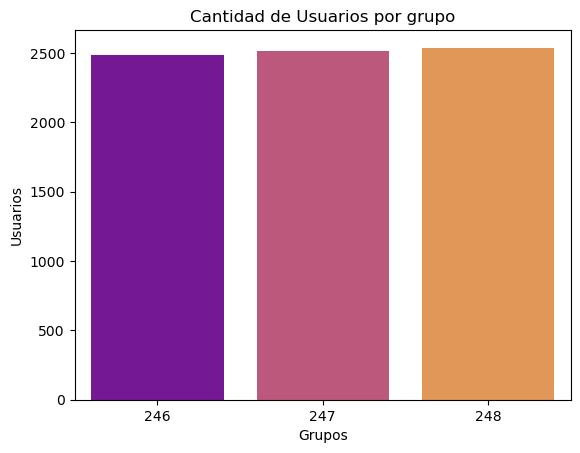

In [63]:
#cuantos usuarios hay en cada grupo

groups_quantity = new_data.groupby('group')['user_id'].nunique().reset_index()
print(groups_quantity)

sns.barplot(groups_quantity, x='group', y = 'user_id', palette='plasma')
plt.title('Cantidad de Usuarios por grupo')
plt.ylabel('Usuarios')
plt.xlabel('Grupos')
plt.show()

Los tres grupos tienen un número similar de usuarios, lo que sugiere una buena distribución aleatoria de los usuarios entre los grupos de control y el grupo de prueba. Esto es buen indicio de que el experimento está bien equilibrado en términos de tamaño de muestra.

In [64]:
#comparar grupos de control (246 vs 247)
#Comparación usando una prueba de chi-cuadrado

# se selecciona los grupos 246 y 247
control_1 = new_data[new_data['group'] == 246]
control_2 = new_data[new_data['group'] == 247]

# Contamos los eventos en cada grupo
eventos_control_1 = control_1['event_name'].value_counts()
eventos_control_2 = control_2['event_name'].value_counts()

# Crear una tabla de contingencia
tabla_contingencia = pd.DataFrame([eventos_control_1, eventos_control_2]).fillna(0)

# Prueba de chi-cuadrado
chi2, p, _, _ = stats.chi2_contingency(tabla_contingencia)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 347.1835264073801, p-value: 7.113427142599721e-74


 El valor p extremadamente bajo sugiere que hay una diferencia estadísticamente significativa entre los grupos de control (246 y 247).
 Esto podría ser preocupante, debido a que los grupos de control deberían ser similares si el experimento estuviera bien configurado. Esta diferencia podría indicar un problema con la recopilación de datos o lo aleatorio de la prueba, lo que podría afectar la validez del experimento.

In [65]:
#Eventos mas populares y analisis de proporciones
eventos = new_data['event_name'].unique()

for evento in eventos:
    # Proporciones
    prop_246 = control_1[control_1['event_name'] == evento]['user_id'].nunique() / control_1['user_id'].nunique()
    prop_247 = control_2[control_2['event_name'] == evento]['user_id'].nunique() / control_2['user_id'].nunique()
    
    # Prueba de proporciones
    prop_test = sm.stats.proportions_ztest([prop_246, prop_247], [control_1['user_id'].nunique(), control_2['user_id'].nunique()])
    print(f"Evento: {evento}, Z-test statistic: {prop_test[0]}, p-value: {prop_test[1]}")

Evento: Tutorial, Z-test statistic: 0.0012766629523960308, p-value: 0.9989813706176395
Evento: MainScreenAppear, Z-test statistic: 0.008888469158259618, p-value: 0.9929081210717539
Evento: OffersScreenAppear, Z-test statistic: 0.020806353717147306, p-value: 0.9834001293038448
Evento: CartScreenAppear, Z-test statistic: 0.022816835660709276, p-value: 0.9817963786054364
Evento: PaymentScreenSuccessful, Z-test statistic: 0.028582308543983137, p-value: 0.977197722056851


Las pruebas Z realizadas entre los grupos 246 y 247 resultaron en p-valores muy altos (todos mayores que 0.97), indicando que no hay diferencias estadísticamente significativas entre estos grupos en términos de proporciones de usuarios que realizan estos eventos.

A pesar de la diferencia global significativa entre los grupos 246 y 247 observada en el paso anterior, no parece haber una diferencia significativa en la frecuencia de eventos individuales, lo que sugiere que, al menos en términos de comportamiento específico de eventos, los grupos pueden ser 
comparables.

In [66]:
# Análisis del grupo de prueba (248) comparado con los grupos de control
# Grupo 248
grupo_248 = new_data[new_data['group'] == 248]

for evento in eventos:
    # Proporciones para el grupo de prueba y controles
    prop_248 = grupo_248[grupo_248['event_name'] == evento]['user_id'].nunique() / grupo_248['user_id'].nunique()
    prop_246 = control_1[control_1['event_name'] == evento]['user_id'].nunique() / control_1['user_id'].nunique()
    prop_247 = control_2[control_2['event_name'] == evento]['user_id'].nunique() / control_2['user_id'].nunique()

    # Comparación con el grupo de control 246
    prop_test_246 = sm.stats.proportions_ztest([prop_248, prop_246], [grupo_248['user_id'].nunique(), control_1['user_id'].nunique()])
    
    # Comparación con el grupo de control 247
    prop_test_247 = sm.stats.proportions_ztest([prop_248, prop_247], [grupo_248['user_id'].nunique(), control_2['user_id'].nunique()])
    
    print(f"Evento: {evento}")
    print(f"Comparación con control 246: Z-test statistic: {prop_test_246[0]}, p-value: {prop_test_246[1]}")
    print(f"Comparación con control 247: Z-test statistic: {prop_test_247[0]}, p-value: {prop_test_247[1]}")

Evento: Tutorial
Comparación con control 246: Z-test statistic: -0.009099599833988746, p-value: 0.9927396699789565
Comparación con control 247: Z-test statistic: -0.007842366294778186, p-value: 0.9937427611528249
Evento: MainScreenAppear
Comparación con control 246: Z-test statistic: -0.017421366224465034, p-value: 0.9861004639590968
Comparación con control 247: Z-test statistic: -0.008536244386867379, p-value: 0.9931891451115376
Evento: OffersScreenAppear
Comparación con control 246: Z-test statistic: -0.02732361636948874, p-value: 0.9782016207595986
Comparación con control 247: Z-test statistic: -0.006485906046076767, p-value: 0.9948250319855865
Evento: CartScreenAppear
Comparación con control 246: Z-test statistic: -0.03543800525453853, p-value: 0.9717304799221358
Comparación con control 247: Z-test statistic: -0.012603229340768973, p-value: 0.9899443441025072
Evento: PaymentScreenSuccessful
Comparación con control 246: Z-test statistic: -0.028336435583944886, p-value: 0.97739382086

Los valores p en las comparaciones entre el grupo 248 y los controles (246 y 247) son altos (todos mayores que 0.97), lo que sugiere que no hay diferencias estadísticamente significativas en los eventos entre el grupo de prueba y los grupos de control.  Esto indica que el cambio de fuente no afectó significativamente el comportamiento del usuario en la aplicación, al menos en términos de los eventos analizados.

In [67]:
#Nivel de significancia
#corrección de Bonferroni
# Nivel de significancia ajustado por número de pruebas
n_tests = len(eventos) * 3  # 3 comparaciones por evento (control 1, control 2, control combinado)
significancia_ajustada = 0.05 / n_tests
print(f"Nivel de significancia ajustado: {significancia_ajustada}")


Nivel de significancia ajustado: 0.0033333333333333335


Dado el número de pruebas realizadas, el nivel de significancia ajustado (0.0033) es más estricto que el convencional (0.05). Esto refuerza la conclusión de que las diferencias observadas no son estadísticamente significativas y que el cambio de fuente no tuvo un impacto observable en el comportamiento de los usuarios.

---

CONCLUSIONES

* Los datos de la tienda se nivelan desde el 01 de agosto del 2019 hasta el 07 de agosto de 2019, por lo que los siguientes calculos se realizan en base a los datos recaudados en estas fechas 
* Segun el embudo de eventos, el evento mas popular corresponde a 'Abrir la pagina principal', pero el paso de esta accion a 'Abrir la pagina de ofertas' es tambien el momento en donde se pierden más usuarios, ya que solo un 62% de los usuarios que entra a la pagina principal, luego pasan a la pagina de ofertas. 
* Continuando con la idea anterior, el 81% de los usuarios que entra a la pagina de ofertas, luego llega hasta el carrito de compras; y el 94% de quienes llegan al carrito de compras, finalmente realizan un pago exitoso. 
* El 47.7% de los usuarios realizan un viaje completo desde el primer evento de abrir la pagina principal y realizar un pago exitoso. 
* Aparentemente entre los grupos de prueba A 246 y 247 no habria una diferencia significativa en cada uno de los eventos y tampoco entre estos dos grupos frente al grupo B 248. 
*  Dado que los grupos de control no eran completamente equivalentes, es necesario tener precaución al interpretar los resultados. Sin embargo, los análisis de eventos específicos no muestran diferencias significativas, lo que podría sugerir que el cambio en la fuente (página) no tuvo un impacto negativo o positivo significativo.
* Segun todo lo anterior se recomienda NO CONTINUAR con la prueba A/B. 
